In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:
path = './data_new/'
file_name = !ls $path


file_name_min = ['0005.json', '0045.json'] #vert
file_name_mod = ['0007.json', '0015.json', '0026.json', '0042.json', '0018.json'] #orange
file_name_sev = ['0046.json', '0057.json', '0035.json'] #rouge

In [3]:
print(file_name)

['0001.json', '0005.json', '0007.json', '0015.json', '0018.json', '0026.json', '0035.json', '0042.json', '0045.json', '0046.json', '0057.json']


In [4]:
jsons = [json.load(open(path + i)) for i in file_name]
jsons_min = [json.load(open(path + i)) for i in file_name_min]
jsons_mod = [json.load(open(path + i)) for i in file_name_mod]
jsons_sev = [json.load(open(path + i)) for i in file_name_sev]
jsons = [jsons_min, jsons_mod, jsons_sev]
print(jsons[0][0].keys())

dict_keys(['component_count', 'voxel_nbr', 'lung_pixels', 'ske_min_per_vessel', 'min_ske_min_per_vessel', 'max_ske_min_per_vessel', 'mean_ske_min_per_vessel', 'min_ske_max_per_vessel', 'max_ske_max_per_vessel', 'mean_ske_max_per_vessel', 'min_ske_mean_per_vessel', 'max_ske_mean_per_vessel', 'mean_ske_mean_per_vessel', 'mean_mean_all_vessel', 'std_deviation', 'max_max_all_vessel', 'min_max_all_vessel', 'mean_max_all_vessel', 'mean_all_vessel', 'max_all_vessel'])


In [17]:
#print l'histogramme des champs avec une seule valeur pour tous les json.
#champ c'est la liste des champs
plt.style.use('seaborn-deep')
def print_hist(jsons, champ):
    print(champ[0])
    col = ["bisque", "orangered", "darkred"]
    fig, axes = plt.subplots(len(champ), 1, figsize = (16,40))
    for i in range(len(champ)):
            lst = [[k[champ[i]] for k in l] for l in jsons]
            axes[i].hist(lst, color = col)
            print(lst[2])
            axes[i].set_title(champ[i])
            #axes[i].text(.5,.7,champ[i], horizontalalignment='center', transform=axes[i].transAxes)

    fig.subplots_adjust(hspace=0.5, left = 0.4, top = 1)

#     plt.tight_layout()

    return

In [18]:
jsons_sev[1]['voxel_nbr']

1865278

mean_ske_min_per_vessel
[1.5299469034469326, 1.3204679628754452, 1.3773457525413197]
[1.5809008789975727, 1.3492682892180565, 1.4149310947122347]
[1.0, 1.0, 1.0]
[8.306623862918075, 6.082762530298219, 6.4031242374328485]
[1.5470733778824342, 1.3299136908197153, 1.3898164362936742]
[1.6439939278743454, 1.4009500100534622, 1.4521820700355101]
[1.6883587782886815, 1.4279753965425552, 1.4843629629267243]


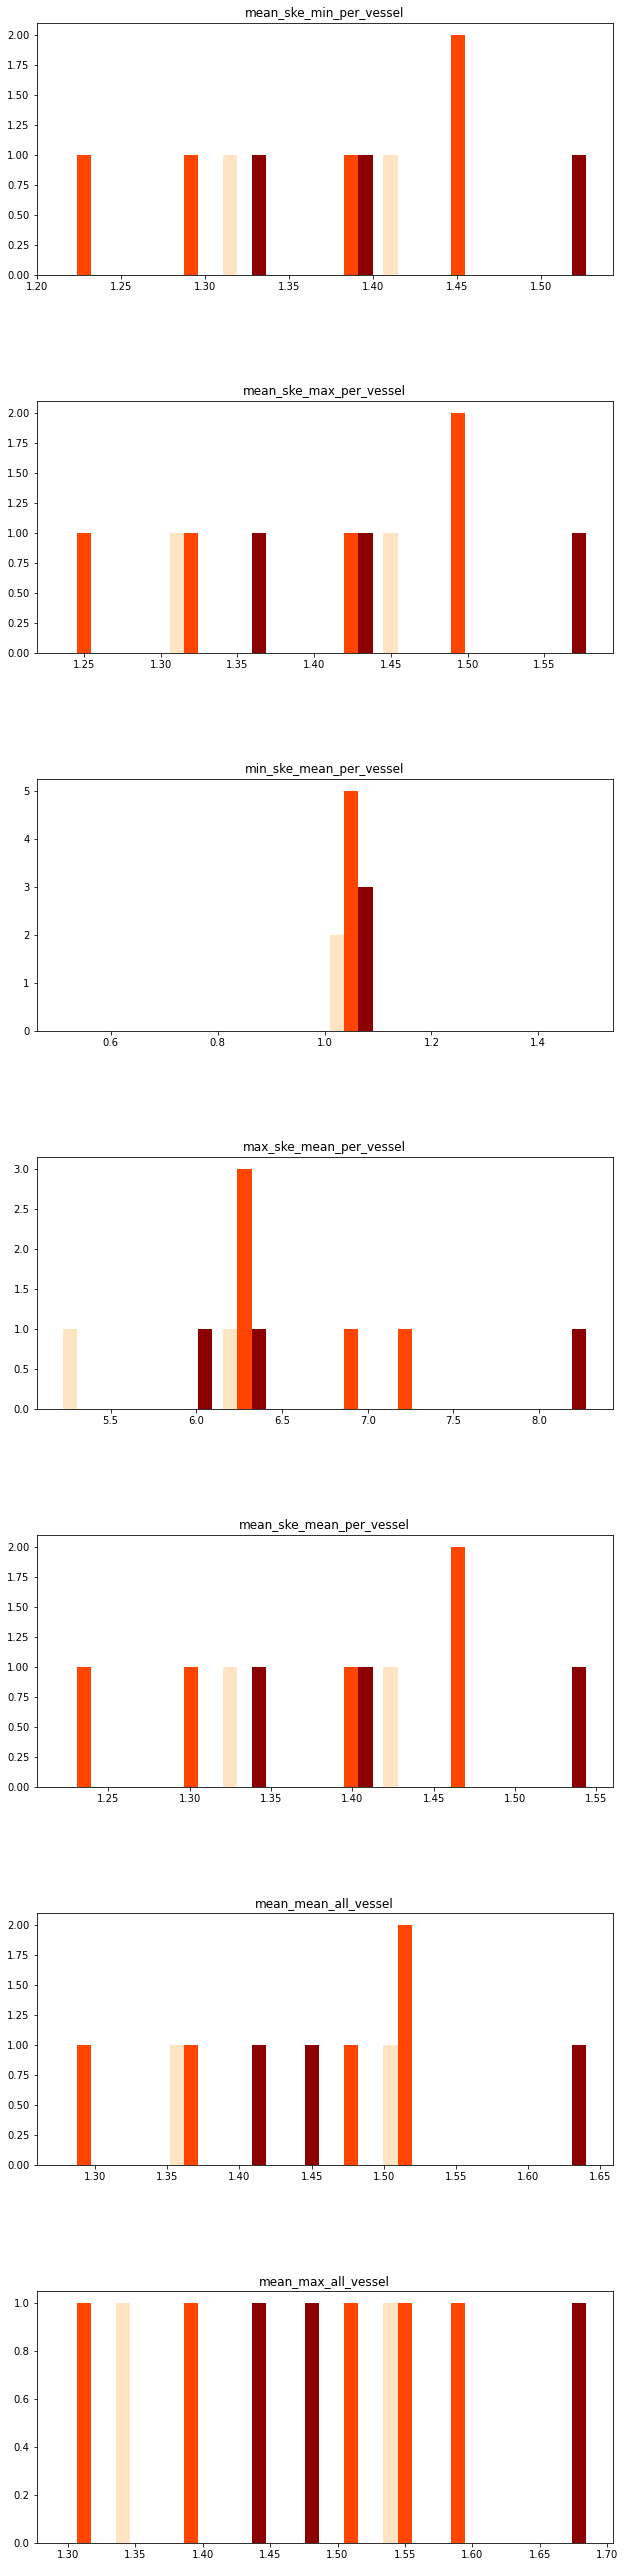

In [20]:
champs = ['mean_ske_min_per_vessel', 'mean_ske_max_per_vessel', 'min_ske_mean_per_vessel', 'max_ske_mean_per_vessel', 'mean_ske_mean_per_vessel', 'mean_mean_all_vessel', 'mean_max_all_vessel']
print_hist(jsons, champs)


In [7]:
#print l'histogramme d'un champs avec une liste de valeur pour tous les json.
#champ c'est la liste des champs
def print_hist_multiple_value(jsons, champ):
    ite_max = 0
    for i, vali in enumerate(jsons):
        for j in vali:
            ite_max += 1
    fig, axes = plt.subplots(ite_max, 1, figsize = (10,25))
    ite = 0

        
    for i, vali in enumerate(jsons):
        lol = len(vali[i])
        for j, valj in enumerate(vali):
            if (i == 0):
                
                axes[ite].set_title('patient ' + str(ite))
                axes[ite].hist(valj[champ], color = ["bisque"])
            elif(i == 1):
                axes[ite].set_title('patient ' + str(ite))
                axes[ite].hist(valj[champ], color = ["orangered"])
            else:
                axes[ite].set_title('patient ' + str(ite))
                axes[ite].hist(valj[champ], color = ["darkred"])
            ite += 1
    fig.subplots_adjust(hspace=0.5, left = 0.4, top = 1)
            


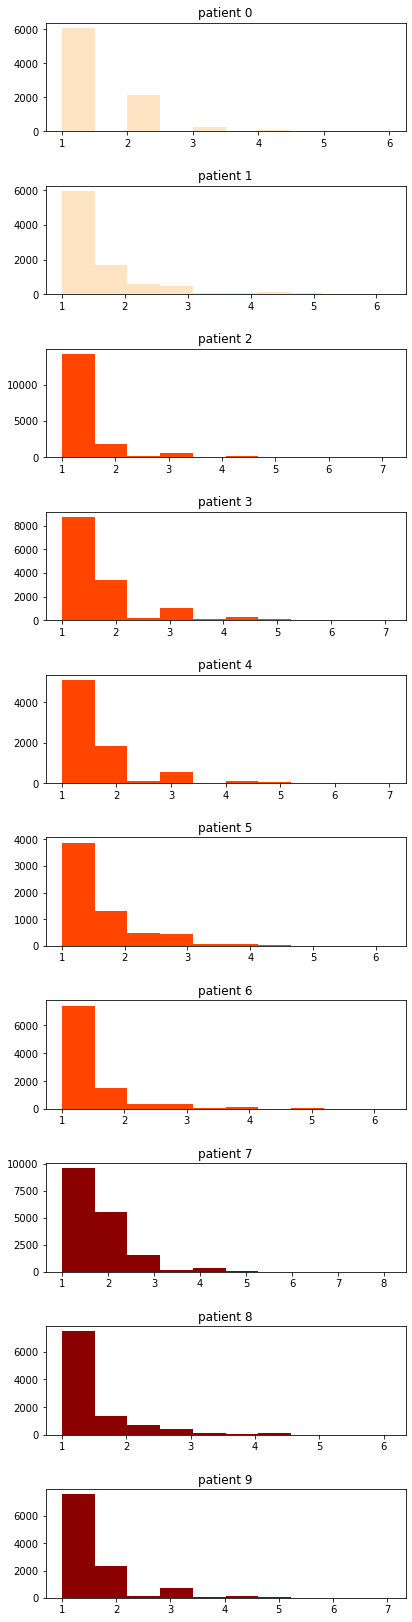

In [8]:
print_hist_multiple_value(jsons, 'mean_all_vessel')

In [25]:
#même chose que la fonction précédente mais cela les met sur un seul plot

def print_hist_multiple_value(jsons, champ):
    fig, axes = plt.subplots(1, 1, figsize = (15,5))
    flathead = []
    col = ['bisque', 'orangered', 'darkred']
    cols = []
    for i, json_group in enumerate(jsons):
        for j, json in enumerate(json_group):
            flathead.append(json)
            cols.append(col[i])
    print(len(cols), len(flathead))
    
    axes.hist([flathead[i][champ] for i in range(len(flathead))], color = cols)
    axes.set_title(champ)
    fig.subplots_adjust(hspace=0.5, top = 1)
    

In [27]:
champs

['component_count',
 'voxel_nbr',
 'lung_pixels',
 'min_ske_min_per_vessel',
 'max_ske_min_per_vessel',
 'mean_ske_min_per_vessel',
 'min_ske_max_per_vessel',
 'max_ske_max_per_vessel',
 'mean_ske_max_per_vessel',
 'min_ske_mean_per_vessel',
 'max_ske_mean_per_vessel',
 'mean_ske_mean_per_vessel',
 'mean_mean_all_vessel',
 'std_deviation',
 'max_max_all_vessel',
 'min_max_all_vessel',
 'mean_max_all_vessel']

10 10
10 10
10 10


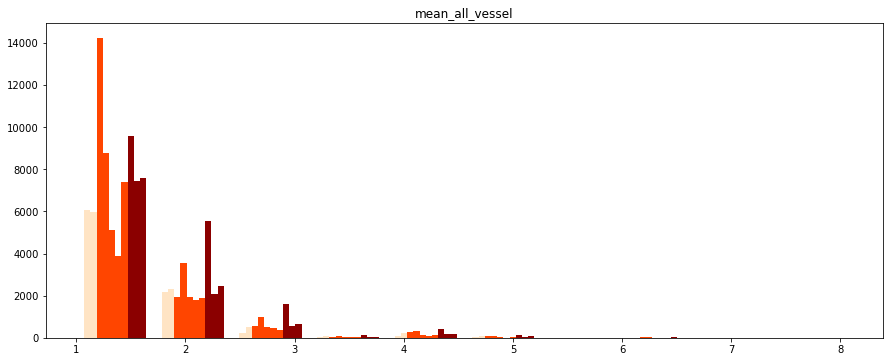

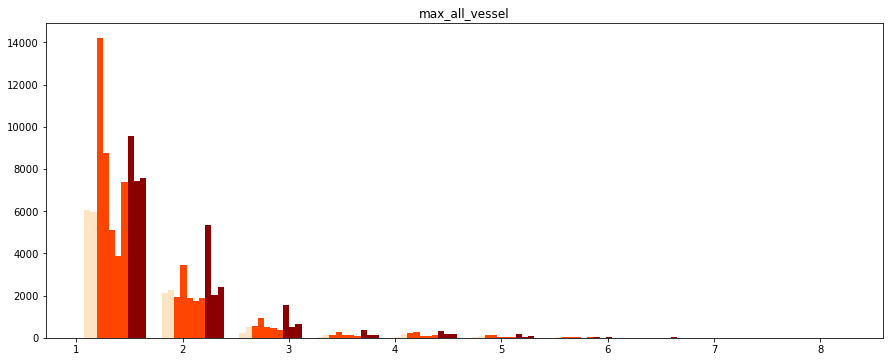

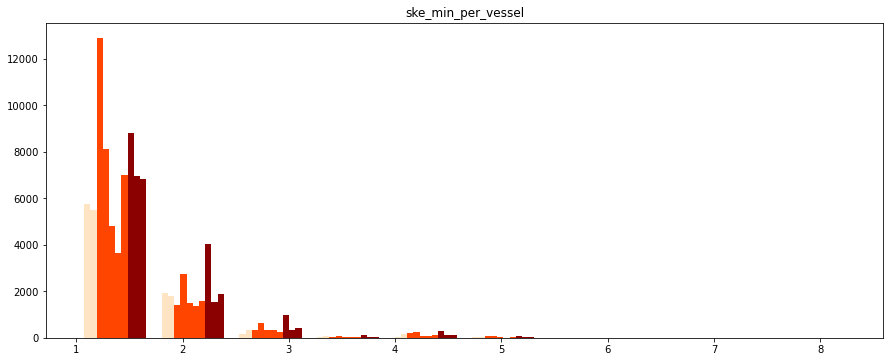

In [29]:
print_hist_multiple_value(jsons, "mean_all_vessel")
print_hist_multiple_value(jsons, "max_all_vessel")
print_hist_multiple_value(jsons, "ske_min_per_vessel")


In [7]:
df_min = pd.DataFrame(jsons_min).T

df_min.columns = ['a', 'b']
df_min = df_min.drop(['lung_pixels', 'mean_all_vessel', "max_all_vessel", "ske_min_per_vessel", 'min_ske_min_per_vessel','min_ske_max_per_vessel', "min_max_all_vessel", "min_ske_mean_per_vessel", "std_deviation"], axis=0)

df_min['mean'] = (df_min['a'] + df_min['b']) / 2
df_min = df_min.drop(['a', 'b'], axis = 1)



df_mod = pd.DataFrame(jsons_mod).T
df_mod.columns = ['a', 'b', 'c','d','e']
df_mod = df_mod.drop(['lung_pixels', 'mean_all_vessel', "max_all_vessel", "ske_min_per_vessel", 'min_ske_min_per_vessel', 'min_ske_max_per_vessel', "min_max_all_vessel", "min_ske_mean_per_vessel", "std_deviation"], axis=0)
df_mod['mean'] = (df_mod['a'] + df_mod['b'] + df_mod['c'] + df_mod['d']) / 4
df_mod = df_mod.drop(['a', 'b', 'c', 'd', 'e'], axis = 1)

df_sev = pd.DataFrame(jsons_sev).T
df_sev = df_sev.drop(['lung_pixels', 'mean_all_vessel', "max_all_vessel", "ske_min_per_vessel", 'min_ske_min_per_vessel', 'min_ske_max_per_vessel', "min_max_all_vessel", "min_ske_mean_per_vessel", "std_deviation"], axis=0)
df_sev.columns = ['a', 'b', 'c']
df_sev['mean'] = (df_sev['a'] + df_sev['b'] + df_sev['c']) / 3
df_sev = df_sev.drop(["a", 'b', 'c'], axis = 1)
df_sev

df_tot = pd.concat([df_min, df_mod, df_sev], axis = 1)
df_tot.columns = ["covid faible", "covid modéré", "covid sévère"]

#df_tot = df_tot.rename(index={'component_count': 'nombre de composant noyens', 'mean_mean_all_vessel' : 'moyenne de taille de vaisseau', 'std_deviation': 'écart type', 'max_max_all_vessel': 'plus grand vaisseaux'})

In [8]:
df_tot

,covid faible,covid modéré,covid sévère
component_count,8864,11294.8,12937.3
voxel_nbr,1.59378e+06,2.16246e+06,2.96604e+06
max_ske_min_per_vessel,5.58221,6.61855,6.93084
mean_ske_min_per_vessel,1.3695,1.37325,1.40925
max_ske_max_per_vessel,6.19841,6.73504,7.03253
mean_ske_max_per_vessel,1.39838,1.40915,1.44837
max_ske_mean_per_vessel,5.70269,6.65874,6.93084
mean_ske_mean_per_vessel,1.37857,1.38496,1.42227
mean_mean_all_vessel,1.42769,1.45559,1.49904
max_max_all_vessel,6.24037,7.13644,7.15348
